# Clustering
## k-means

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

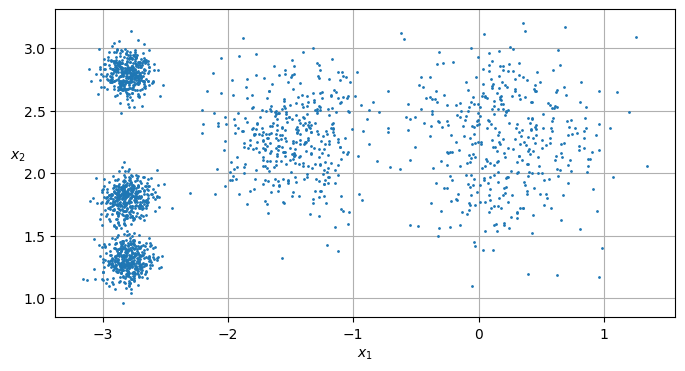

In [2]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [3]:
# centroids algo found
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [4]:
# assign new instance to the cluster
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

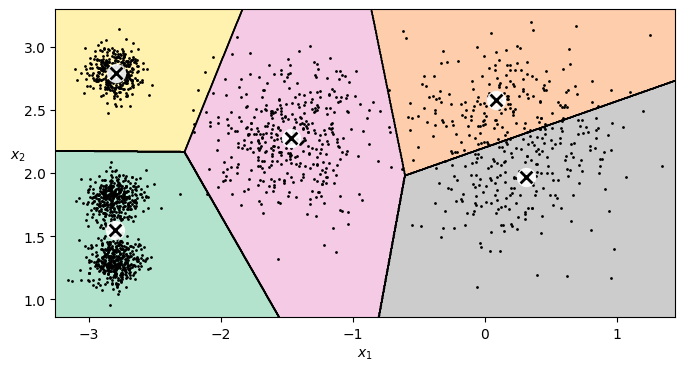

In [5]:
# Voronoi dgm

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

In [6]:
# transform() measure distance from each instance to every centroid
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

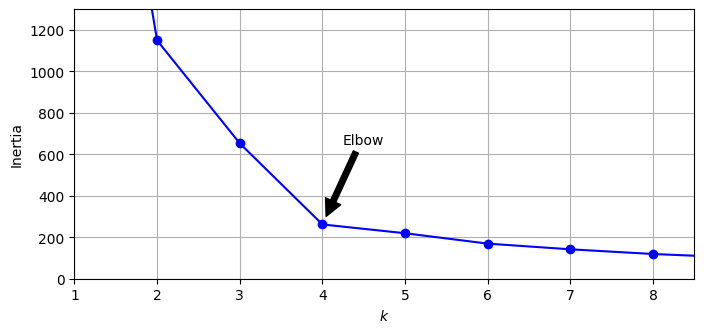

In [7]:
# elbow method

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.show()

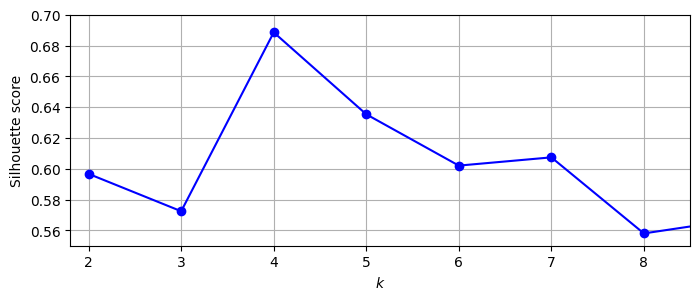

In [8]:
# silhouette score

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

## DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [10]:
# labels of all instances
print(dbscan.labels_)       # -1 index means anomaly

# indeces of core samples
print(dbscan.core_sample_indices_)

# core instances
print(dbscan.components_)

[ 0  1  2  3  1  3  4  3  3  3  3  3  0  3  3  2  0  3  5  0  0 -1  3  6
  4  3  5  0  0  3  2  3  3  6  4  7  0  3  8  4  0  8  2  4  8  3  4  3
  4  3  8  7 -1  4  3  8  1  3  1  8  4  1  3  3  4  4 -1 -1  3  0  6  0
  0 -1  3  7  5  2  1  1  2  3  3  2  4  2  4  1  7  2 -1  7 -1  4  1  1
  6  4  1  8  8  1  3  3  3  3  1  0 -1  8  3  3  2  0  2  1 -1  4  4  8
  7 -1  1 -1  2  7  3  3  7  0  3  3  6  0  5 -1  5  1 -1  2  7  2  2  0
 -1 -1  7  3  3  0  3  1  1  8  3  7  2  2 -1  6  2  3  0  8  3  0  0  2
  4  9  3  8  6  3  2  3  0  1  0  3  2  3  3  3  2  7  3  3  2  0  0  4
  3  3  4  0 -1  3  3 -1  8  2  2  3  7  9  8  7  3  0  6  4  3  8  8  3
  8  1  3  2  7  0  1  4  0  5  3  6  2  2  2  4  9  8  3  0  3  5  6  4
  3  1  0  2 -1  0  3  8  8  6  0  0  0  7  3  2  3  0  2  7  3  3  9  3
  5  3  2  3  3  4  3  1  0  3  0  3  7 -1  3  2  0  8  1  8  3  1  7  8
  0  7  7  2  8  4  1  2  3  3  1  8  7  0  0  0  0  2  4  1  4  3  1  0
  7 -1  3  9  9  2  2  0  4  1  3  0  3  2  6  3  2

In [11]:
# DBSCAN doesn't have a predict() method, so we need to use other techniques to decide which cluster a new instance belongs to.
# using KneighborsClassifier for prediction
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
# now predict which cluster and estimate probability
X_new = np.array([[-0.5, 0], [0,0.5], [1,-0.1], [2,1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[8 2 3 0]
[[0.   0.   0.08 0.   0.   0.   0.   0.   0.92 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.52 0.48 0.   0.   0.   0.   0.  ]
 [0.62 0.   0.   0.   0.   0.38 0.   0.   0.   0.  ]]


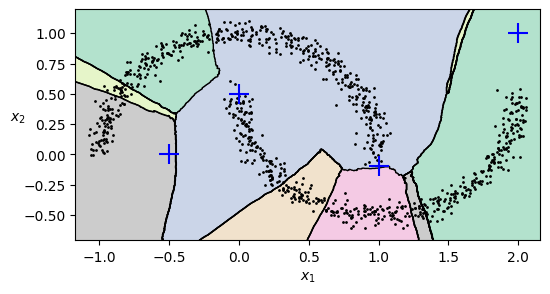

In [13]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

# Gaussian mixtures

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


Let's look at parameters

In [15]:
gm.weights_

array([0.59691359, 0.19919253, 0.20389388])

In [16]:
gm.means_

array([[ 0.48754451,  0.2558046 ],
       [-0.75493242,  0.54593755],
       [ 1.7381551 , -0.06894429]])

In [17]:
gm.covariances_

array([[[ 0.17282086, -0.10655283],
        [-0.10655283,  0.29079033]],

       [[ 0.04730153,  0.05756823],
        [ 0.05756823,  0.08420892]],

       [[ 0.0546733 ,  0.06417407],
        [ 0.06417407,  0.09094972]]])

In [18]:
gm.converged_

True

In [19]:
gm.n_iter_

16

Predicting new instance

In [20]:
# hard clustering
gm.predict(X)

array([2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [21]:
# soft clustering
gm.predict_proba(X).round(3)

array([[0.002, 0.   , 0.998],
       [0.03 , 0.97 , 0.   ],
       [1.   , 0.   , 0.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ]], shape=(1000, 3))

In [22]:
# GMM is generative model. so you can sample new instances from it
X_new, y_new = gm.sample(6)
X_new 

array([[ 0.15440328,  0.12001242],
       [ 0.20969793,  1.57267967],
       [ 0.61094647,  0.74063116],
       [-0.2389276 ,  0.73719188],
       [ 1.68147267, -0.15179005],
       [ 1.78690216,  0.09592423]])

In [23]:
y_new

array([0, 0, 0, 0, 2, 2])

In [24]:
# density of a given location
gm.score_samples(X).round(2)

array([-0.27, -1.28, -1.54, -1.76, -0.64, -1.76, -1.73, -1.63, -1.84,
       -1.78, -1.8 , -1.74, -0.6 , -1.43, -1.6 , -1.36, -0.12, -1.37,
       -2.18, -0.82, -0.73, -1.23, -1.73, -0.18, -1.71, -1.7 , -1.02,
       -0.11, -0.43, -1.66, -1.72, -1.92, -1.28,  0.17, -1.97, -1.6 ,
       -0.35, -1.47, -0.62, -2.13, -0.75, -1.1 , -1.29, -1.66, -1.48,
       -1.6 , -1.57, -1.63, -1.68, -2.14, -1.73, -1.6 , -1.86, -1.6 ,
       -1.57, -1.05, -0.36, -1.72, -0.41, -0.05, -1.8 , -1.21, -1.7 ,
       -1.89, -2.12, -1.8 , -1.19, -2.16, -1.56, -0.4 , -0.38, -0.72,
       -0.55, -2.46, -1.75, -1.74, -2.26, -1.81, -0.06, -0.65, -1.72,
       -1.51, -1.84, -1.51, -1.91, -1.36, -1.61, -0.85, -1.58, -1.9 ,
       -2.06, -1.53, -2.12, -1.81, -2.16, -0.51, -0.18, -1.79, -1.13,
       -1.21, -1.83, -0.63, -1.54, -1.78, -1.49, -1.88, -2.16, -0.07,
       -1.29, -0.19, -2.02, -1.38, -1.51, -0.29, -1.44, -0.11, -1.13,
       -1.86, -1.8 , -0.18, -1.48, -0.49, -2.25, -1.21, -1.46, -1.77,
       -1.52, -1.66,

/tmp/ipykernel_455/1810030801.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
/tmp/ipykernel_455/1810030801.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


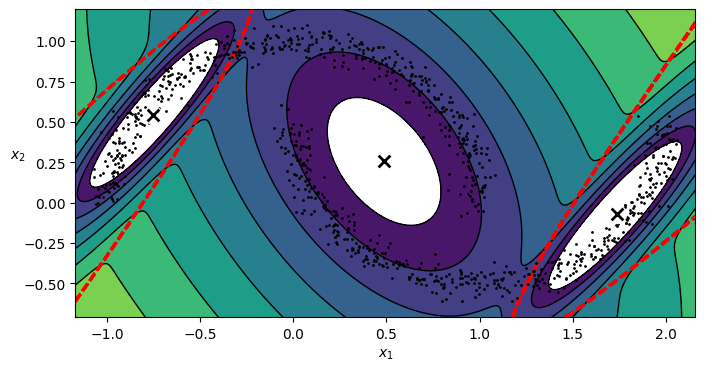

In [25]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

finding optimal number of clusters

In [26]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

/mnt/Programming/ML/Unsupervised-learning/venv/lib/python3.12/site-packages/sklearn/mixture/_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.14, 0.13, 0.09, 0.12, 0.15, 0.17, 0.11, 0.08, 0.  , 0.  ])

8 clusters are good for this example.